The primary objective of this project is to extract COVID-19 data from a specific website, focusing on essential columns such as the number of affected cases, deaths, recoveries, and active cases in each state division of India. To accomplish this, we will utilize web scraping techniques to gather the required data. Our data source for this project is the website 'coronaclusters.in'.

In [48]:
# Install all require library
!pip install requests
!pip install bs4

In [49]:
# Import all require library like request,os,panda,csv and beautiful.
import bs4
from bs4 import BeautifulSoup
import os
import pandas as pd
import requests


In [62]:
# After import all the libraries we need to headers and save it variable.
headers={"User-Agent":"mozilla/5.0"}

# Now we need to save the url in a variable from where the data will download.
url='https://coronaclusters.in'

# Now use requests library to get the url with headers and convert into text and save in a variable.
rqd = requests.get(url,headers=headers).text

# Then use 'panda.read' to read the data in html.
df = pd.read_html(rqd)[0]

# Now save the data in to a variable after convert into a dataframe with the help of 'pd.DataFrame'.
cd=pd.DataFrame(df)

# We used head() function to see the data. By default it will show first 5 rows but you assign '()' here how many rows you want to see.
cd.head(50)


,State,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Last Updated
0,Maharashtra,6396805,4145,135139,100,6195744,62452,2021-08-13 17:57:22
1,Kerala,3702417,12294,18743,142,3510909,172250,2021-08-13 17:57:22
2,Karnataka,2930529,1065,37007,28,2871448,22048,2021-08-13 17:57:22
3,Delhi,1437118,27,25069,0,1411582,467,2021-08-13 17:57:22
4,Uttar Pradesh,1708965,17,22785,1,1685761,419,2021-08-13 17:57:22
5,Telangana,652785,405,3845,3,641847,7093,2021-08-13 17:57:22
6,Gujarat,825196,14,10078,0,814934,184,2021-08-13 17:57:22
7,Rajasthan,953954,11,8954,0,944820,180,2021-08-13 17:57:22
8,Tamil Nadu,2590632,1851,34547,28,2535715,20370,2021-08-13 17:57:22
9,Madhya Pradesh,792043,7,10515,1,781434,94,2021-08-13 17:57:22


In [63]:
# We used tail() function to see the data last 5 rows.
cd.tail()

,State,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Last Updated
34,Nagaland,29195,44,605,4,26601,1153,2021-08-13 17:57:22
35,Sikkim,28726,20,361,0,26018,2068,2021-08-13 17:57:22
36,Tripura,81308,52,778,1,78929,1538,2021-08-13 17:57:22
37,Dadra and Nagar Haveli and Daman and Diu,10660,2,4,0,10617,8,2021-08-13 17:57:22
38,State Unassigned,0,0,0,0,0,0,2021-08-13 17:57:22


In [64]:
# To check how many rows and columns we have in the data.
cd.shape

(39, 8)

In [65]:
# To check the data type and some more information about data
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            39 non-null     object
 1   Total Cases      39 non-null     int64 
 2   New Cases        39 non-null     int64 
 3   Total Deaths     39 non-null     int64 
 4   New Deaths       39 non-null     int64 
 5   Total Recovered  39 non-null     int64 
 6   Active Cases     39 non-null     int64 
 7   Last Updated     39 non-null     object
dtypes: int64(6), object(2)
memory usage: 2.6+ KB


In [66]:
# To check the null value if we have any null value then it must take care.
cd.isna().sum()

State              0
Total Cases        0
New Cases          0
Total Deaths       0
New Deaths         0
Total Recovered    0
Active Cases       0
Last Updated       0
dtype: int64

In [67]:
# We need to remove the unwanted colum from the data.
cd.drop(['New Cases','New Deaths','Last Updated'],axis=1,inplace=True)

In [68]:
# We have to remove the last row of this data which is we don't want.
cd.drop(index=cd.index[-1],axis=0,inplace=True)

In [69]:
# We have to remove the unwanted rows from this data.
cd.drop(index=cd.index[30],axis=0,inplace=True)

In [71]:
# We have to remove the unwanted rows from this data.
cd.drop(index=cd.index[29],axis=0,inplace=True)

In [72]:
# We hve to rename the columns name as per requirement.
cd = cd.rename(columns={'Total Cases':'Affected','Total Deaths':'Death','Total Recovered':'Survived/Recover'})

In [73]:
# Need to check data for conformation. But after delete some rows the index has been changed.
cd.head(50)

,State,Affected,Death,Survived/Recover,Active Cases
0,Maharashtra,6396805,135139,6195744,62452
1,Kerala,3702417,18743,3510909,172250
2,Karnataka,2930529,37007,2871448,22048
3,Delhi,1437118,25069,1411582,467
4,Uttar Pradesh,1708965,22785,1685761,419
5,Telangana,652785,3845,641847,7093
6,Gujarat,825196,10078,814934,184
7,Rajasthan,953954,8954,944820,180
8,Tamil Nadu,2590632,34547,2535715,20370
9,Madhya Pradesh,792043,10515,781434,94


In [74]:
# In order to reset the index we can use reset.index function.
cd = cd.reset_index(drop=True)

In [75]:
# Now index is in correct order.
cd.head(50)

,State,Affected,Death,Survived/Recover,Active Cases
0,Maharashtra,6396805,135139,6195744,62452
1,Kerala,3702417,18743,3510909,172250
2,Karnataka,2930529,37007,2871448,22048
3,Delhi,1437118,25069,1411582,467
4,Uttar Pradesh,1708965,22785,1685761,419
5,Telangana,652785,3845,641847,7093
6,Gujarat,825196,10078,814934,184
7,Rajasthan,953954,8954,944820,180
8,Tamil Nadu,2590632,34547,2535715,20370
9,Madhya Pradesh,792043,10515,781434,94


In [76]:
# To see the changes in the data.
cd.shape

(36, 5)

In [77]:
# Check the info of the data again.
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             36 non-null     object
 1   Affected          36 non-null     int64 
 2   Death             36 non-null     int64 
 3   Survived/Recover  36 non-null     int64 
 4   Active Cases      36 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


In [78]:
# Export the data and save into a csv format.
cd.to_csv ('Data_2.csv', index = False, header=True)

# **Analysis**

In [ ]:
# We need to import matplotlib and seaborn library for create the reports on this data.
import matplotlib.pyplot as plt
import seaborn as sns

# *Covid Affected Case Analysis of each state in India*

Text(0.5, 1.0, 'Total affected people of each state')

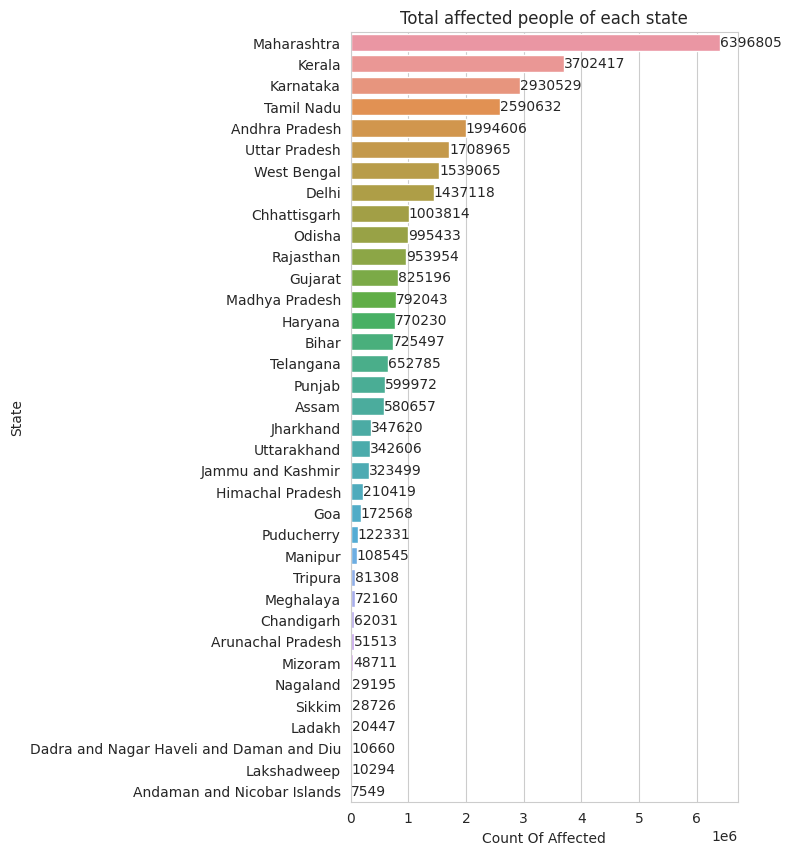

In [79]:
# This is the plot size configaration.
plt.figure(figsize=(5,10))

# Now we can use plot style but it's not mandatory.
sns.set_style("whitegrid")

# In order to sort the data in decending order.
df_sh = cd.sort_values(by=['Affected'],ascending=False)

# We used seaborn to making the diagram, Y axis is define 'state' and x axis is define 'Affected' columns and mention the data.
ax = sns.barplot(y = 'State', x = 'Affected', data = df_sh)

# We created this forloop for mention the count on each bar.
for i in ax.containers:
  ax.bar_label(i, fmt='%.0f', label_type='edge')

plt.xlabel("Count Of Affected") # This is title of x axis.
plt.ylabel("State") # This is title of Y axis.
plt.title("Total affected people of each state") # This is Title of Diagram.

In this diagram, we depict the number of COVID-19 cases in each state of India. It is evident that Maharashtra has the highest number of affected individuals, while the Andaman and Nicobar Islands have the lowest number of cases.

# *Covid Active Cases Analysis of each state in India*

Text(0.5, 1.0, 'Total Active Cases of each state in India')

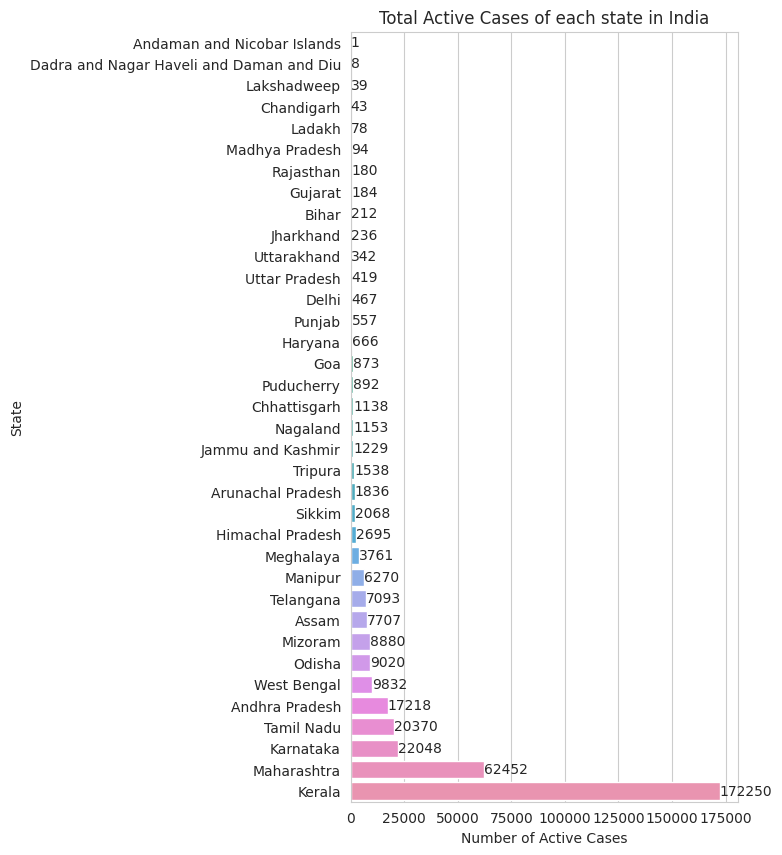

In [80]:
# This is the plot size configaration.
plt.figure(figsize=(5,10))

# Now we can use plot style but it's not needed every time.
sns.set_style("whitegrid")

# In order to sort the data in ascending order.
sd_sh = cd.sort_values(by=['Active Cases'],ascending=True)

# We used seaborn to making the diagram, Y axis is define 'state' and x axis is define 'Active Cases' columns and mention the data.
vx = sns.barplot(y = 'State', x = 'Active Cases', data = sd_sh)

# We created this forloop for mention the count on each bar.
for bars in vx.containers:
  vx.bar_label(bars, fmt='%.0f', label_type='edge')

plt.xlabel("Number of Active Cases") # This is label of x axis.
plt.ylabel("State") # This is label of Y axis.
plt.title("Total Active Cases of each state in India") # This is Title of Chart.


In this diagram, we present the distribution of active COVID-19 cases across different states in India. Our analysis reveals that Kerala has the highest number of active cases, indicating a significant ongoing outbreak in the state. Conversely, the Andaman and Nicobar Islands exhibit the lowest number of active cases, suggesting a relatively lower burden of the virus in that region.

# *Recovery Cases From Covid Analysis of each state in India*

Text(0.5, 1.0, 'Total number of Recovery case in each state')

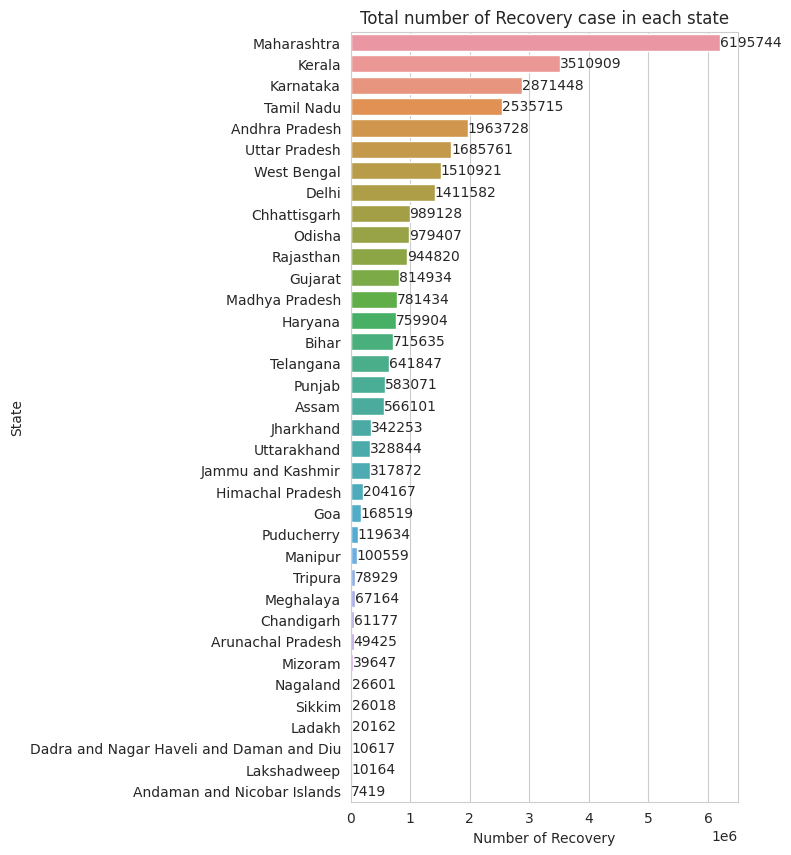

In [81]:
# This is the plot size configaration.
plt.figure(figsize=(5,10))

# Now we can use plot style but it's optional.
sns.set_style("whitegrid")

# In order to sort the data in decending order.
kd_sh = cd.sort_values(by=['Survived/Recover'],ascending=False)

# We used seaborn to making the diagram, Y axis is define 'state' and x axis is define 'Survived/Recover' columns and mention the data.
mp = sns.barplot(y = 'State', x = 'Survived/Recover', data = kd_sh)

# We created this forloop for mention the count on each bar.
for bars in mp.containers:
  mp.bar_label(bars, fmt='%.0f', label_type='edge')

plt.xlabel("Number of Recovery") # Title of x axis.
plt.ylabel("State") # Title of y axis.
plt.title("Total number of Recovery case in each state") # Title of this Diagram.

After analyzing the data and creating a visual representation, it is evident that Maharashtra has witnessed the highest number of COVID-19 recoveries among all the states in India. This indicates a positive trend in terms of successful recovery and healthcare management in the state. On the other hand, the Andaman and Nicobar Islands have recorded the lowest number of COVID-19 recoveries, suggesting the need for enhanced efforts to improve recovery rates in that region.

# Compare with Survived and Affected Case

Text(0.5, 1.0, 'Compare With Survived and Affected Case')

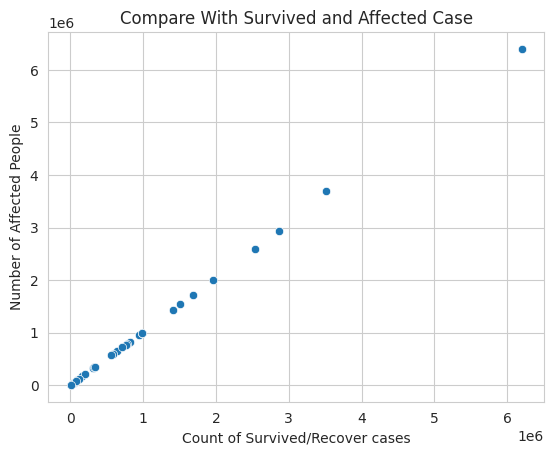

In [82]:
# We can use scatterplot for compare two numerical data.
sns.scatterplot(x= "Survived/Recover", y= "Affected", data = cd)

plt.xlabel("Count of Survived/Recover cases") # Title of x axis.
plt.ylabel("Number of Affected People") # Title of y axis.
plt.title("Compare With Survived and Affected Case") # Title of this Diagram.

Upon comparing the data of the survived and affected cases, it is evident that the graph exhibits a linear regression pattern. This implies that a substantial number of people have successfully recovered from COVID-19 in each state of India. While it is unfortunate that some individuals have lost their lives to the virus, the overall trend indicates that approximately 85% of the affected population has survived.

# *Covid Death Analysis of each state in India*

Text(0.5, 1.0, 'Total number of Death case in each state')

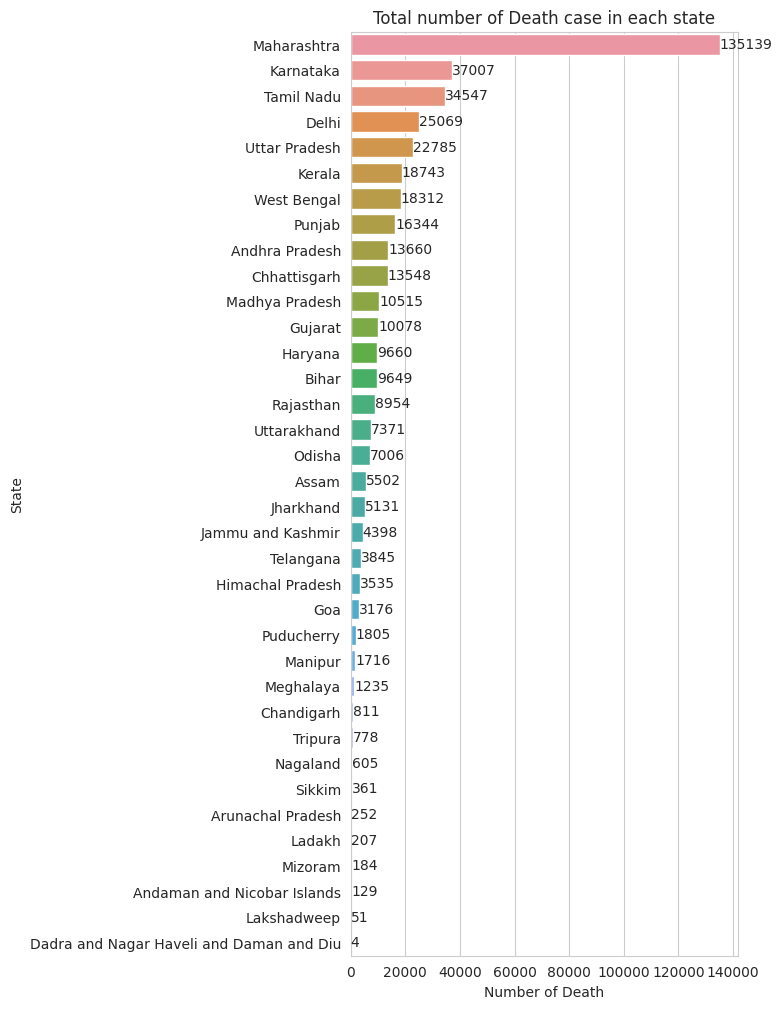

In [83]:
# This is the plot size configaration.
plt.figure(figsize=(5,12))

# Now we can use plot style but it's optional.
sns.set_style("whitegrid")

# In order to sort the data in decending order.
bp_sh = cd.sort_values(by=['Death'],ascending=False)

# We used seaborn to making the diagram, Y axis is define 'state' and x axis is define 'Death' columns and mention the data.
tg = sns.barplot(y = 'State', x = 'Death', data = bp_sh)

# We created this forloop for mention the count on each bar.
for bars in tg.containers:
  tg.bar_label(bars, fmt='%.0f', label_type='edge')

plt.xlabel("Number of Death") # Label of X axis.
plt.ylabel("State") # Label Of Y axis.
plt.title("Total number of Death case in each state") # Title of the Plot.

Based on the chart depicting the number of death cases due to COVID-19 in each state of India, it is disheartening to note that a significant number of lives have been lost. The data reveals that Maharashtra has experienced the highest number of COVID-19-related deaths, indicating a considerable toll on the state. On the other hand, the union territory of Dadra and Nagar Haveli and Daman and Diu has reported the lowest number of deaths, suggesting relatively fewer fatalities in that region.
